In [1]:
import random

from sonify import play_midi_from_data, scale_list_to_range

import scipy.signal
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

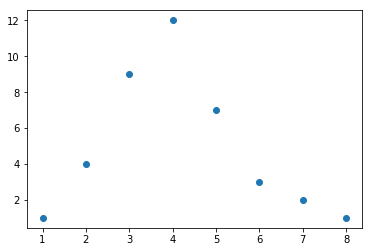

In [2]:
# Get the data we'd like to play from
simple_data = [(1, 1), (2, 4), (3, 9), (4, 12), (5, 7), (6, 3), (7, 2), (8, 1)]

plt.scatter(*zip(*simple_data))

In [3]:
play_midi_from_data(simple_data)

Finished!


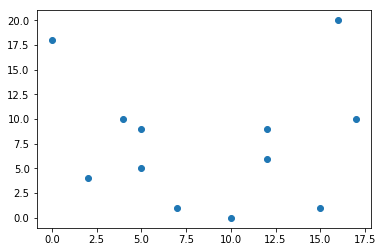

In [4]:
# Generate some random data

new_data = []
for i in range(0, 12):
    new_data.append((random.randint(0, 20), random.randint(0, 20)))
    
plt.scatter(*zip(*new_data))

In [5]:
play_midi_from_data(new_data)

Finished!


In [6]:
def get_and_process_kepler_data():
    """
    Example from @GeertHub's talk on "How to find a planet"
    http://nbviewer.jupyter.org/github/barentsen/how-to-find-a-planet/blob/master/how-to-find-a-planet.ipynb
    """
    import astropy.io.fits
    from astropy.stats import LombScargle
    # Read in Kepler data for star number 011904151
    data = astropy.io.fits.open("https://archive.stsci.edu/missions/kepler/target_pixel_files/0119/011904151/kplr011904151-2010009091648_lpd-targ.fits.gz")[1].data
    time = data["TIME"][data['QUALITY'] == 0]
    images = data["FLUX"][data['QUALITY'] == 0]
    
    lightcurve = np.sum(images, axis=(1, 2))
    trend = scipy.signal.savgol_filter(lightcurve, 101, polyorder=3) 
    percent_change = 100 * ((lightcurve / trend) - 1)

    frequency, power = LombScargle(time, percent_change, nterms=2).autopower(minimum_frequency=1/1.5, maximum_frequency=1/0.6, samples_per_peak=10)
    period = 1 / frequency[np.argmax(power)]
    
    x_points = []
    y_points = []
    for i in range(10):
        mask = (time >= time[0] + i*period) & (time < time[0] + (i+1)*period)
        x_points += [x for x in time[mask] - time[0] - i*period]
        y_points += [y for y in percent_change[mask]]

    normalized_x = scale_list_to_range(x_points, new_min=0, new_max=30)
    normalized_y = scale_list_to_range(y_points, new_min=0, new_max=30)

    normed_data = list(zip(normalized_x, normalized_y))
    
    return normed_data

/Users/erin/.virtualenvs/sonify/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


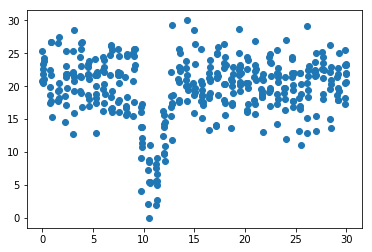

In [7]:
normed_data = get_and_process_kepler_data()

plt.scatter(*zip(*normed_data)) 

In [8]:
play_midi_from_data(normed_data)

Finished!
